<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h3>TITLE : TRANSFORMATION TECHNIQUES</h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div><h4>
Exercise No. 1</h4> <div style="text-align:Right">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reg No : 23MDT0047 </div>
Date : April 23, 2024
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>AIM :</b> To apply the transformation techniques. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(From the previous practical, we can see that the data is non-stationary.) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Data Description :</b> Passengers Data from January, 1949 (01-1949) to December, 1960 (12-1960).&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div> 
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It consists of two columns - Month and Passengers&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>



- Null Hypothesis H0: The given airline passengers data is not stationary.
- Alternative H1: The given airline passengers data is stationary.


**Input and Output**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_excel("Passenger.xlsx")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# Log Transformation
df['log_passengers'] = np.log(df['Passengers'])
df.head(5)

,Month,Passengers,log_passengers
0,1949-01,112,4.718499
1,1949-02,118,4.770685
2,1949-03,132,4.882802
3,1949-04,129,4.859812
4,1949-05,121,4.795791


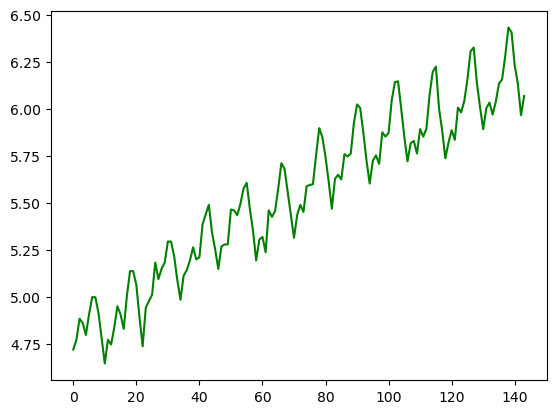

In [6]:
#plot the data
plt.plot(df['log_passengers'],color = 'green')
plt.show()

In [7]:
# Perform Augmented - Dickey Fuller Test
ad = df["log_passengers"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -1.7170
p - value: 0.4224


### Conclusion

In [8]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value < 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


### First-Order Differencing

In [9]:
df["passenger_diff"] = df["Passengers"] - df["Passengers"].shift(1)
df.head(2)

,Month,Passengers,log_passengers,passenger_diff
0,1949-01,112,4.718499,NaN
1,1949-02,118,4.770685,6.0


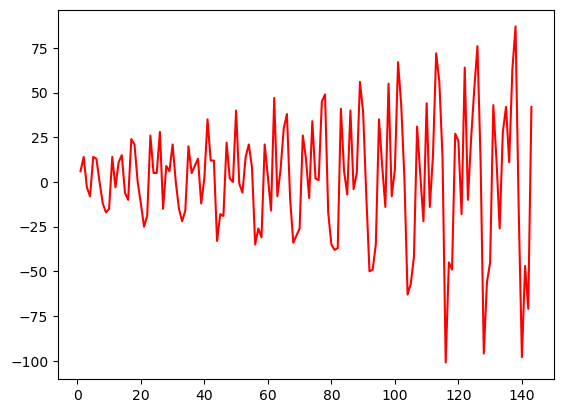

In [10]:
plt.plot(df['passenger_diff'].dropna(),color = 'red')
plt.show()

In [11]:
ad = df["passenger_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -2.8293
p-value: 0.0542


### Conclusion

In [12]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


### Power Transformation

In [13]:
df["passenger_log_diff"] = df['log_passengers'] - df['log_passengers'].shift(1)
df.head(2)

,Month,Passengers,log_passengers,passenger_diff,passenger_log_diff
0,1949-01,112,4.718499,NaN,NaN
1,1949-02,118,4.770685,6.0,0.052186


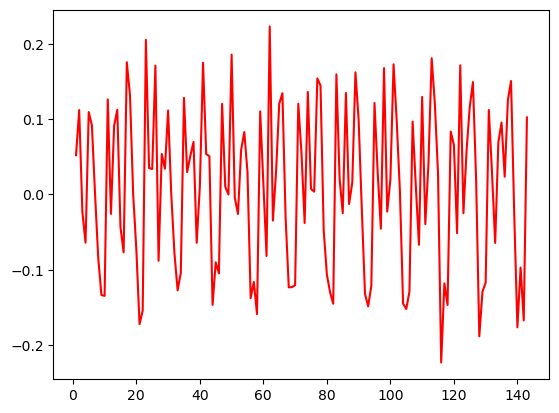

In [14]:
plt.plot(df['passenger_log_diff'].dropna(),color = 'red')
plt.show()

In [15]:
# Perform Augmented - Dickey Fuller Test
ad = df["passenger_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -2.7171
p-value: 0.0711


### Conclusion

In [16]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


**Conclusion**:
<br>Even after transforming the data, the data still shows non - stationarity traits. However, In first-order differencing the p-value (0.0542) is close to 0.05 and hence, we can consider the data is stationary in case of first order differencing.

<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h3>TITLE : TRANSFORMATION TECHNIQUES</h3> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<h4>Exercise No. 2</h4> <div style="text-align:Right">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reg No : 23MDT0047 </div>
Date : April 23, 2024
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>AIM :</b> To apply the transformation techniques &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(From the previous practical, we can infer that the data is non-stationary) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Data Description :</b> Stock Price Data from 01/04/2015 to 31/03/2021. It consists of six columns - Date,Open,High,Low,Close,Volume&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>


 
- Null Hypothesis H0: The given Microsoft stock price data is not stationary.
- Alternative H1: The given Microsoft stock price data is stationary.


**Input and Output**

In [17]:
data = pd.read_excel("Stock_Market_data.xlsx")
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-06-04 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-07-04 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-08-04 16:00:00,41.48,41.69,41.04,41.42,24753438


# For 'Open'

## Log Transformation

In [18]:
data['Open_log'] = np.log(data['Open'])
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245


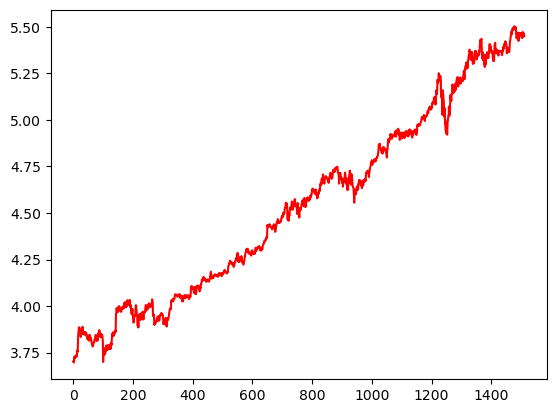

In [19]:
plt.plot(data['Open_log'],color = 'red')
plt.show()

In [20]:
# Perform Augmented - Dickey Fuller Test
ad = data["Open_log"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -0.3103
p-value: 0.9240


### Conclusion

In [21]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


## First order differencing

In [22]:
data['Open_diff'] = data['Open'] - data['Open'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06


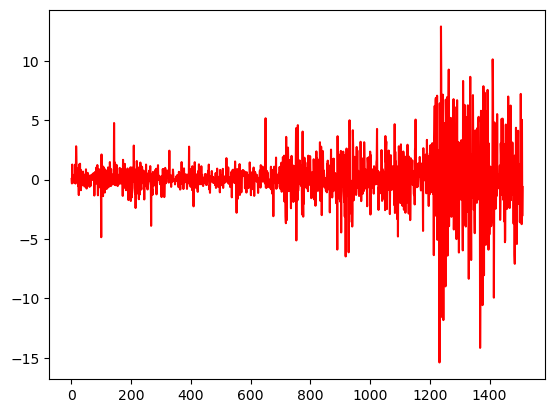

In [23]:
plt.plot(data['Open_diff'].dropna(),color = 'red')
plt.show()

In [24]:
# Perform Augmented - Dickey Fuller Test
ad = data["Open_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -9.9136
p-value: 0.0000


### Conclusion

In [25]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis 
Given data is stationary


## Power Transformation

In [26]:
data['Open_log_diff'] = data['Open_log'] - data['Open_log'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477


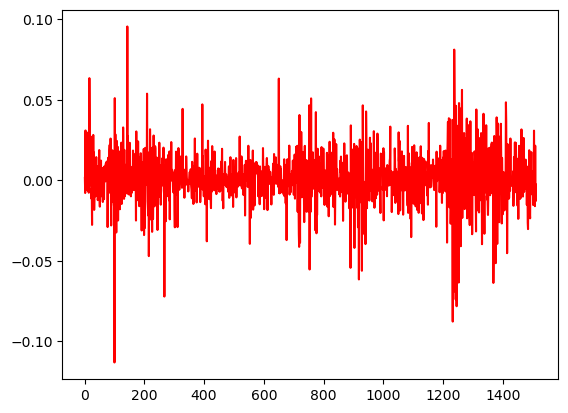

In [27]:
plt.plot(data['Open_log_diff'].dropna(),color = 'red')
plt.show()

In [28]:
# Perform Augmented - Dickey Fuller Test
ad = data["Open_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -30.9400
p-value: 0.0000


### Conclusion

In [30]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis 
Given data is stationary


# For 'High'

## Log Transformation

In [31]:
data['High_log'] = np.log(data['High'])
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210


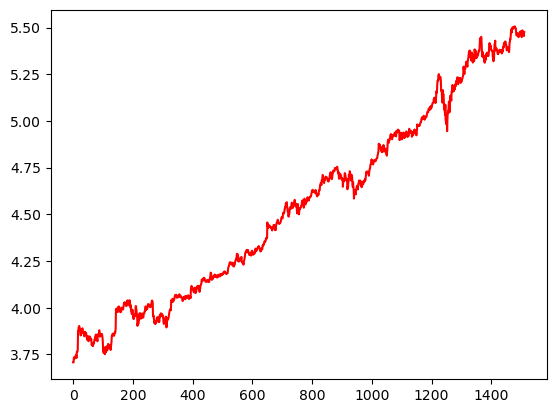

In [32]:
plt.plot(data['High_log'],color = 'red')
plt.show()

In [33]:
# Perform Augmented - Dickey Fuller Test
ad = data["High_log"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -0.0881
p - value: 0.9506


### Conclusion

In [34]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


## First order differencing

In [35]:
data['High_diff'] = data['High'] - data['High'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02


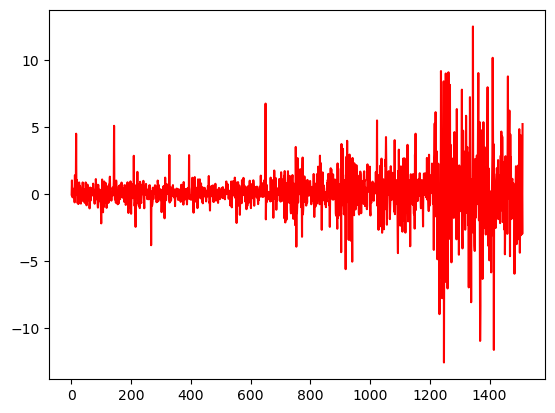

In [36]:
plt.plot(data['High_diff'].dropna(),color = 'red')
plt.show()

In [37]:
# Perform Augmented - Dickey Fuller Test
ad = data["High_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -9.9764
p - value: 0.0000


### Conclusion

In [38]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis 
Given data is stationary


## Power Transformation

In [39]:
data['High_log_diff'] = data['High_log'] - data['High_log'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491


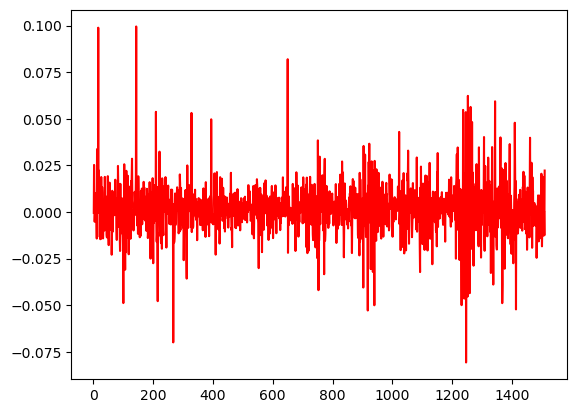

In [40]:
plt.plot(data['High_log_diff'].dropna(),color = 'red')
plt.show()

In [41]:
# Perform Augmented - Dickey Fuller Test
ad = data["High_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -17.3354
p - value: 0.0000


### Conclusion

In [42]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


# For 'Low'

## Log Transformation

In [43]:
data['Low_log'] = np.log(data['Low'])
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875


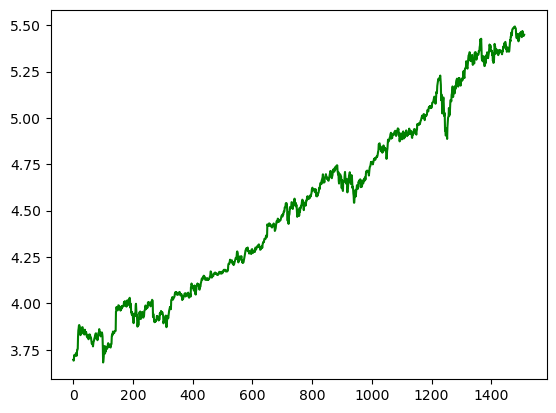

In [44]:
plt.plot(data['Low_log'],color = 'green')
plt.show()

In [45]:
# Perform Augmented - Dickey Fuller Test
ad = data["Low_log"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -0.1517
p - value: 0.9440


### Conclusion

In [46]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis 
Given data is not stationary


## First order differencing

In [47]:
data['Low_diff'] = data['Low'] - data['Low'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log,Low_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875,-0.19


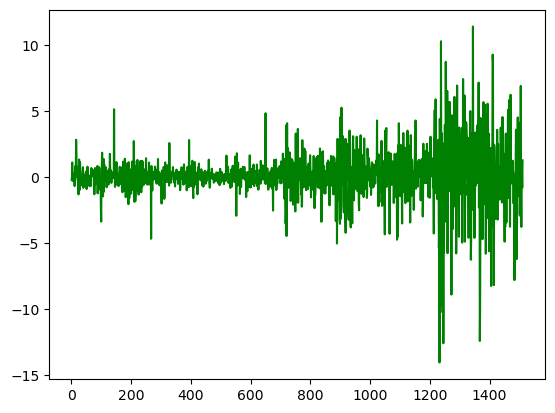

In [48]:
plt.plot(data['Low_diff'].dropna(),color = 'green')
plt.show()

In [49]:
# Perform Augmented - Dickey Fuller Test
ad = data["Low_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -11.8087
p-value: 0.0000


### Conclusion

In [50]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis 
Given data is stationary


## Power Transformation

In [51]:
data['Low_log_diff'] = data['Low_log'] - data['Low_log'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log,Low_diff,Low_log_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600,NaN,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875,-0.19,-0.004725


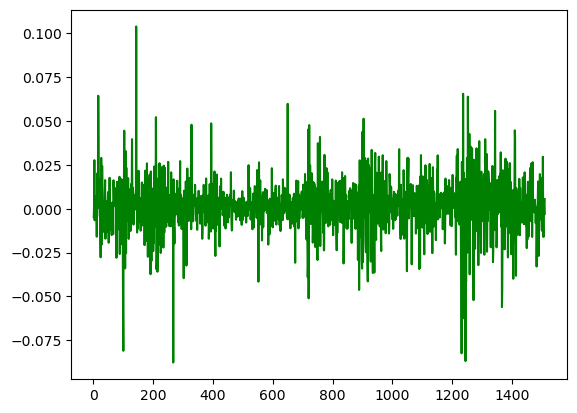

In [52]:
plt.plot(data['Low_log_diff'].dropna(),color = 'green')
plt.show()

In [53]:
# Perform Augmented - Dickey Fuller Test
ad = data["Low_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -14.0303
p - value: 0.0000


### Conclusion

In [54]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


# For 'Close'

## Log Transformation

In [55]:
data['Close_log'] = np.log(data['Close'])
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log,Low_diff,Low_log_diff,Close_log
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600,NaN,NaN,3.706719
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875,-0.19,-0.004725,3.696103


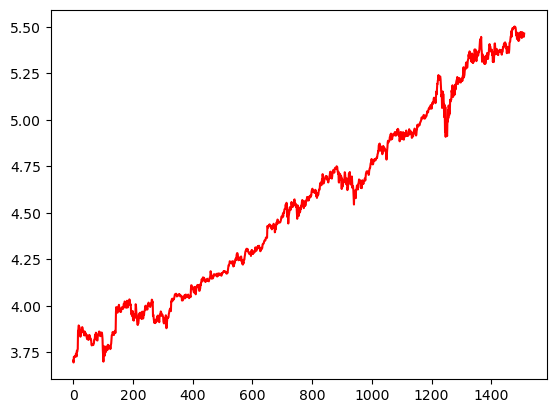

In [56]:
plt.plot(data['Close_log'],color = 'red')
plt.show()

In [57]:
# Perform Augmented - Dickey Fuller Test
ad = data["Close_log"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -0.1290
p-value: 0.9465


### Conclusion

In [58]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value > 0.05, we accept null hypothesis i,e
Given data is not stationary


## First order differencing

In [59]:
data['Close_diff'] = data['Close'] - data['Close'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log,Low_diff,Low_log_diff,Close_log,Close_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600,NaN,NaN,3.706719,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875,-0.19,-0.004725,3.696103,-0.43


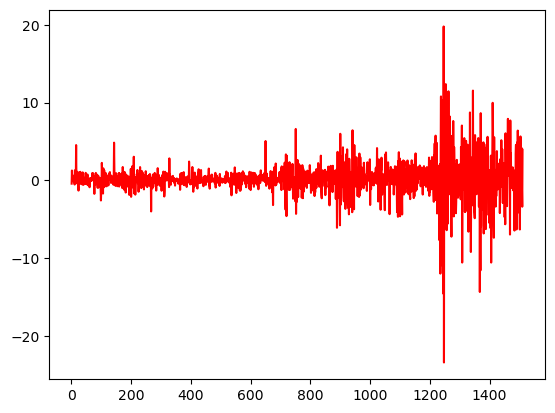

In [60]:
plt.plot(data['Close_diff'].dropna(),color = 'red')
plt.show()

In [61]:
# Perform Augmented - Dickey Fuller Test
ad = data["Close_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -10.0383
p - value: 0.0000


### Conclusion

In [62]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


## Power Transformation

In [63]:
data['Close_log_diff'] = data['Close_log'] - data['Close_log'].shift(1)
data.head(2)

,Date,Open,High,Low,Close,Volume,Open_log,Open_diff,Open_log_diff,High_log,High_diff,High_log_diff,Low_log,Low_diff,Low_log_diff,Close_log,Close_diff,Close_log_diff
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322,3.703768,NaN,NaN,3.707701,NaN,NaN,3.696600,NaN,NaN,3.706719,NaN,NaN
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476,3.705245,0.06,0.001477,3.707210,-0.02,-0.000491,3.691875,-0.19,-0.004725,3.696103,-0.43,-0.010616


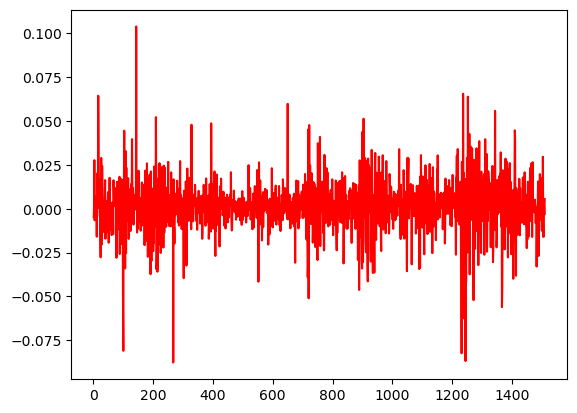

In [64]:
plt.plot(data['Low_log_diff'].dropna(),color = 'red')
plt.show()

In [65]:
# Perform Augmented - Dickey Fuller Test
ad = data["Close_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF-statistic: -13.8011
p-value: 0.0000


### Conclusion

In [66]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


**Conclusion**:
<br>The Microsoft stock price data is succesfully transformed into a stationary time series and verified by AD-Fuller Test. The ideal transformations are "First - order Differencing" and "Power Transformation" as, the p-value is always less than 0 for all the variables (Open, high, Low and Close). The log transformation proved to be less effective in transforming the data

<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h3>TITLE : TRANSFORMATION TECHNIQUES</h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<h4>Exercise No. 3</h4> <div style="text-align:Right">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reg No : 23MDT0047 </div>
Date : April 23, 2024
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>AIM :</b> To apply the transformation techniques &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(From the previous practical, we can see that the data is non-stationary) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Data Description :</b> Electric Production from 01/01/1985 to 01/01/2018&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It consists of two columns - Date and Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>



- Null Hypothesis H0: The given Electric Production data is not stationary.
- Alternative H1: The given Electric Production data is stationary.


**Input and Output**

In [81]:
# load the dataset
data = pd.read_excel("ELECTRIC_PRODUCTION.xlsx")
data.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151


## Log Transformation

In [69]:
data['Value_log'] = np.log(data['Value'])
data.head(2)

,DATE,Value,Value_log
0,1985-01-01,72.5052,4.283658
1,1985-01-02,70.6720,4.258049


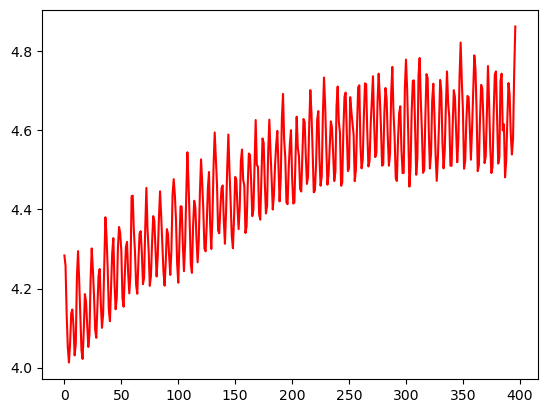

In [70]:
plt.plot(data['Value_log'],color = 'red')
plt.show()

In [71]:
# Perform Augmented - Dickey Fuller Test
ad = data["Value_log"].values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -3.1454
p - value: 0.0234


### Conclusion

In [72]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


## First order differencing

In [73]:
data['Value_diff'] = data['Value'] - data['Value'].shift(1)
data.head(2)

,DATE,Value,Value_log,Value_diff
0,1985-01-01,72.5052,4.283658,NaN
1,1985-01-02,70.6720,4.258049,-1.8332


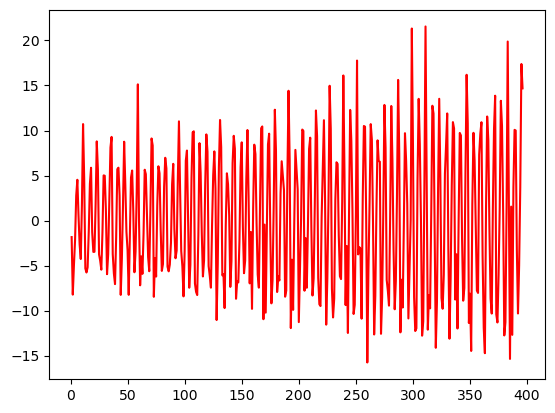

In [74]:
plt.plot(data['Value_diff'].dropna(),color = 'red')
plt.show()

In [75]:
# Perform Augmented - Dickey Fuller Test
ad = data["Value_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -7.1049
p - value: 0.0000


### Conclusion

In [76]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis i,e\n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis i,e\n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis i,e
Given data is stationary


##  Power Transformation

In [77]:
data['Value_log_diff'] = data['Value_log'] - data['Value_log'].shift(1)
data.head(2)

,DATE,Value,Value_log,Value_diff,Value_log_diff
0,1985-01-01,72.5052,4.283658,NaN,NaN
1,1985-01-02,70.6720,4.258049,-1.8332,-0.025609


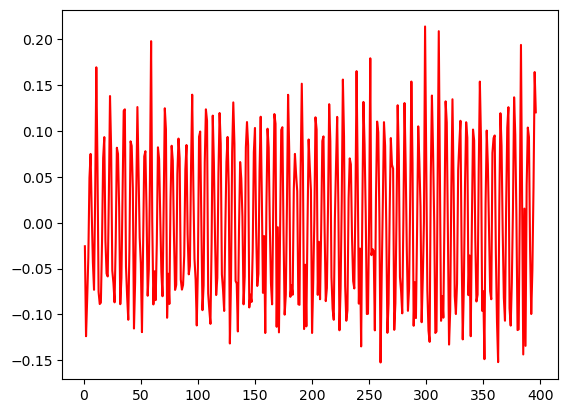

In [78]:
plt.plot(data['Value_log_diff'].dropna(),color = 'red')
plt.show()

In [79]:
# Perform Augmented - Dickey Fuller Test
ad = data["Value_log_diff"].dropna().values
result = adfuller(ad)
print(f"ADF-statistic: {result[0]:.4f}")
print(f"p - value: {result[1]:.4f}")

ADF-statistic: -6.7483
p - value: 0.0000


### Conclusion

In [80]:
if result[1]> 0.05:
    print("Since p-value > 0.05, we accept null hypothesis \n\
Given data is not stationary")
else:
    print("Since p-value <= 0.05, we reject null hypothesis \n\
Given data is stationary")

Since p-value <= 0.05, we reject null hypothesis 
Given data is stationary


**Conclusion**:
<br>The Electric Production data is sucessfully converted into stationary series and is verified by AD-Fuller test. All three methods i,e log transformation, First - order differencing and Power transformation are ideal as p - value in all the cases is less than 0.05